In [1]:

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Perceptron Classification Steps

A perceptron can classify two objects based on their circumference and weight by finding a linear boundary between the two classes in the input space. The following steps outline the process:<br />
**Input Space:** The input space consists of two features, circumference and weight, representing each object.<br />
**Unknown target** function: The target function maps the input space to the correct class in the output space. This function is unknown and must be learned from the data set $ f : X -> y$<br />
**Data Set:** A labelled data set is used to train the perceptron, where each object is represented by its circumference and weight features and is labelled with its class.<br />
**Hypothesis Set:** The hypothesis set consists of all possible linear functions that can separate the two classes in the data set.<br />
**Final Hypothesis:** The final hypothesis is selected from the hypothesis set based on the training data. The perceptron algorithm adjusts the coefficients of the linear function to minimize the error between the actual class labels and the predicted class labels.<br />
**Error Measure:** An error measure, such as mean squared error, is used to evaluate the performance of the final hypothesis.<br />
**In-Sample Error:** The in-sample error is the error measure evaluated on the training data set, which is used to assess the performance of the final hypothesis during the training phase.<br />
**Out-of-Sample Error:** The out-of-sample error is the error measure evaluated on a new, unseen data set, which is used to assess the performance of the final hypothesis on new, unseen data after the training phase.<br />


# Learning Curves
Learning curves allow us to look at the impact that the size of the training data set N has on the ability to keep the difference between $E_{in}$ and $E_{out}$ small.

In [2]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_errors = 1- train_scores
    test_errors = 1-test_scores
    
    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")

    
    plt.legend(loc="best")
    return plt

In [3]:
data = np.loadtxt("data_set_1.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

## Logistic regression learning curve

In [4]:
cv = ShuffleSplit(n_splits=25, test_size=0.2)

<module 'matplotlib.pyplot' from 'c:\\Users\\Thoma\\anaconda3\\envs\\data_science\\Lib\\site-packages\\matplotlib\\pyplot.py'>

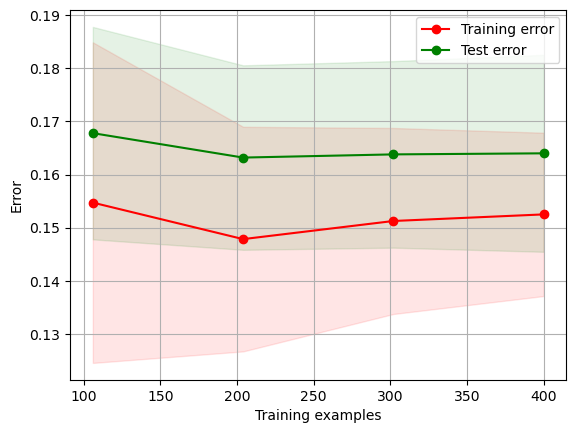

In [5]:
estimator = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

## Neural net learning curves

<module 'matplotlib.pyplot' from 'c:\\Users\\Thoma\\anaconda3\\envs\\data_science\\Lib\\site-packages\\matplotlib\\pyplot.py'>

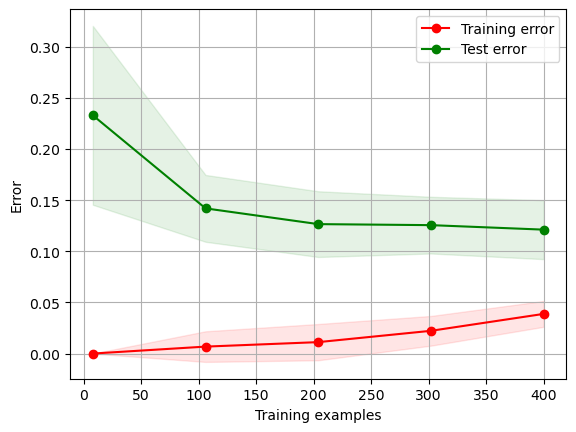

In [6]:
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200, 4), random_state=1)
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

# Reflection

- **Why the training error is (generally) lower than the test error**<br />
 The training error is lower than the test error because the model is fit or trained on the training data and therefore has a lower error on this data set compared to unseen data represented by the test set. The model has not seen the test data during training and may not perform as well on it, resulting in a higher test error. This phenomenon is known as overfitting, where a model is too complex and fits the training data well but fails to generalize to new, unseen data.<br /><br />

- **Why the training error increases as the number of training samples are increased**<br />
Increasing the number of training samples generally increases the complexity of the problem, making it harder for the model to fit the data perfectly. The model must now generalize to a more extensive and potentially more diverse set of examples, which can increase the training error.
Additionally, increasing - the size of the training set often results in a more representative sample of the underlying data distribution, making it less likely that the model will overfit the training data and instead improve its generalization to unseen data.
Generally, it's a trade-off between a low training error and a high test error (overfitting) and an increased training error and standard test error (underfitting). A model that strikes the right balance between these two extremes is said to have good generalization.<br /><br />

- **Which of the two models is the more complex mode**<br />
Logistical regression models tend to be simple, fast, and well-suited for binary classification. In this case, the training error with less than 100 data points is low, while the test error remains high. However, when there are more than 100 data points, the training error increases while the test data decreases. After this point, training errors and test errors are almost identical. 
The neural network classifier starts with a training error close to zero, and as the number of data points increases, the test error also gradually increases. The test error, however, begins close to 0.20 and decreases to close to 0.12 as more data points are added. With the 400 data points, we have available, the neural network doesn't reach a point where in-sample and out-of-sample errors converge. This may happen if more data is available however, adding more data increases the complexity of the model. Therefore the neural network requires more complexity to make accurate predictions. 
The neural network is more complex. With this dataset, the logistical regression model is more appropriate. 


## Linear Regression

Below functions implement linear regression in a closed form (one-step solution using the pseudo-inverse).

In [7]:
def linreg_weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [8]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    
    # Calculation of outputs given weights and data (X). 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [9]:
def calc_error(w,X,y):
    """
    AIM: Calculate the error between the y values and the predicted y values. 
    PARAMETERS: w: weights, X: x values, y: yvalues.
    METHOD: Calculates mean squared error by subtracting the predicted values from the original values 
            and squaring the result to eliminate negative values.
    """
    # Predict the target values using the linreg_predict function
    y_pred = linreg_predict(w, X)
    
    # Calculate the mean squared error between the actual target values and the predicted target values
    error = np.mean((y - y_pred) ** 2)
    
    # Return the error value
    return error

In [10]:
def plot_regression_line(w, X, y, title, color):
    """
    AIM: Plot a regression line based on a set of weights X and y.
    PARAMETERS: w:weights, X: x values, y: y values, title: graph title, color: color of plotted line.
    METHOD: Uses linreg_predict to generate y_predict values then uses matplotlib methods to plot y_predict with X.
    """
    # Predict the target values using the linreg_predict function
    y_pred = linreg_predict(w, X)
    
    # Plot the scatter plot of the data points
    plt.scatter(X, y)
    
    # Plot the regression line using the predicted target values
    plt.plot(X, y_pred, color=color)
    plt.title(title)
    
    # Label the x-axis as 'X'
    plt.xlabel('X')
    
    # Label the y-axis as 'y'
    plt.ylabel('y')
    
    # Show the plot
    plt.show()

In [11]:
data = np.loadtxt("data_set_2.csv", delimiter=",")
X, y = data.T
X = X.T.reshape(20,1)
y = y.T.reshape(20,1)

In [12]:
w = linreg_weights(X, y)
w

array([[0.37569601],
       [0.51050541]])

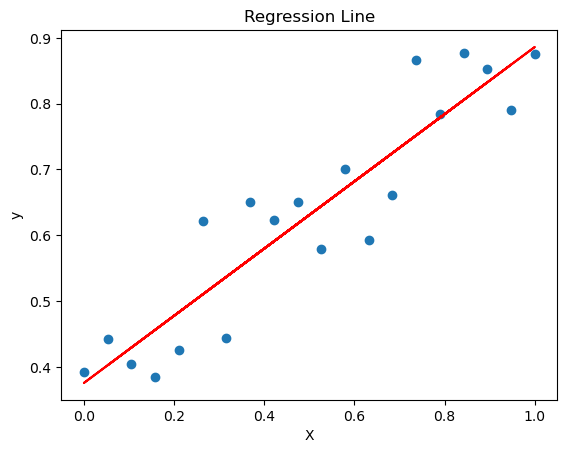

Error: 0.0042818018132555966


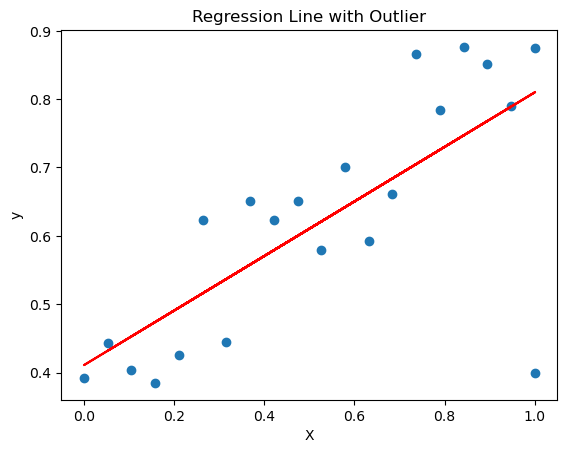

Error with outlier: 0.01357155409333756


In [13]:
# Compute the weights for the linear regression model
w = linreg_weights(X, y)

# Plot the regression line and the data points
plot_regression_line(w, X, y, title='Regression Line', color='red')

# Calculate the error of the linear regression model
error = calc_error(w, X, y)

# Print the error value
print("Error:", error)

# Create an outlier data point
outlier = np.array([[1]])
y_outlier = np.array([[0.4]])

# Combine the original data and the outlier data
X_outlier = np.concatenate((X, outlier), axis=0)
y_all = np.concatenate((y, y_outlier), axis=0)

# Compute the weights for the linear regression model with the outlier data
w_outlier = linreg_weights(X_outlier, y_all)

# Plot the regression line and the data points, including the outlier
plot_regression_line(w_outlier, X_outlier, y_all, title='Regression Line with Outlier', color='red')

# Calculate the error of the linear regression model with the outlier data
error_outlier = calc_error(w_outlier, X_outlier, y_all)

# Print the error value with the outlier
print("Error with outlier:", error_outlier)

## Reflection

**1. Which data point adds the biggest error term to the optimised error function?**<br />
The outlier adds the most significant error term to the optimised error function. Outliers are data points that deviate significantly from the other data points and can dramatically impact linear Regression results.<br /><br />
**2. How does the error contributed by this point relate to its distance from the regression line/function?**<br />
The error contributed by this point relates to its distance from the regression line/function. The further the outlier is from the regression line, the bigger the error term. This is because linear Regression is based on the squared error measure, which squares the difference between the observed data points and the predicted values. This means that the larger the difference, the larger the error term.<br /><br />
**3. How do outliers affect linear Regression, and why?**<br />
Outliers significantly impact linear Regression because they can substantially change the regression line and the predicted values. This is because linear Regression tries to fit a line that minimises the error function, which considers all the data points, including the outliers. Outliers can cause the regression line to deviate significantly from the other data points, leading to significant errors and decreased accuracy.<br /><br />
**4. Under what circumstances will linear Regression with a squared error measure be a good model?**<br />
Linear Regression with a squared error measure will be a good model under certain circumstances. For instance, if there are few outliers and when there is a linear relationship between the variables, it is a good model. Additionally, linear Regression is a good model when the goal is to make predictions based on a set of observed data points. However, it may not be a good model when the relationship between the variables is non-linear or if the data contains significant outliers. 


## Demonstration of effect of outlier on logistic regression decision boundary for comparision with linear classification

Below code demonstrates the effect of an outlier on the decision boundary chosen by logistic regression. This code to compares the effect of outliers in a classification algorithm using mean square error as the error measure with that in a classification algorithm using log likelihood as the error measure.

Load data:

In [14]:
data = np.loadtxt("data_set_3.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

Fit model:

In [15]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

0.83

Extract weights from model:

In [16]:
w_lr = estimator.intercept_
w_lr=np.append(w_lr, estimator.coef_)
w_lr

array([ 0.0734753 ,  1.13198888, -1.608425  ])

Add outlier:

In [17]:
X = np.append(X,[[-2,6]], axis=0)
y = np.append(y,[1],axis=0)

Fit model with outlier:

In [18]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

0.8118811881188119

Extract new weight vector from model:

In [19]:
w_lr_2 = estimator.intercept_
w_lr_2=np.append(w_lr_2, estimator.coef_)
w_lr_2

array([ 0.09420734,  0.96672772, -1.03886315])

Plot original and new decision boundary using weight vectors. Decision boundary is defined by equation: $w_0+x_0\cdot w_1+x_1 \cdot w_2=0 \rightarrow x_2 = -\frac{w_0}{w_2}-x_1\frac{w_1}{w_2}$

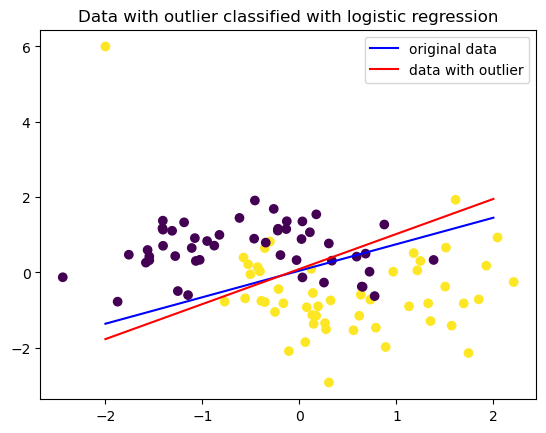

0.6237623762376238

In [20]:
y_p = estimator.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([-2,2],[-w_lr[0]/w_lr[2]+w_lr[1]/w_lr[2]*2,-w_lr[0]/w_lr[2]-w_lr[1]/w_lr[2]*2],'b',label="original data")
plt.plot([-2,2],[-w_lr_2[0]/w_lr_2[2]+w_lr_2[1]/w_lr_2[2]*2,-w_lr_2[0]/w_lr_2[2]-w_lr_2[1]/w_lr_2[2]*2],'r',label='data with outlier')

plt.title("Data with outlier classified with logistic regression")
plt.legend(loc="upper right")
plt.show()
1-sum(abs(y_p-y))/len(y)